Unique failure types: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
Classes found by LabelBinarizer: ['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Random Failures' 'Tool Wear Failure']
[LightGBM] [Info] Number of positive: 85, number of negative: 6615
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012687 -> initscore=-4.354444
[LightGBM] [Info] Start training from score -4.354444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/Users/dev02chandan/Documents/Office@MatiriAI/Predictive Maintenance/venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/Users/dev02chandan/Documents/Office@MatiriAI/Predictive Maintenance/venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/Users/dev02chandan/anaconda3/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/dev02chandan/anaconda3/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, pr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/dev02chandan/Documents/Office@MatiriAI/Predictive Maintenance/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


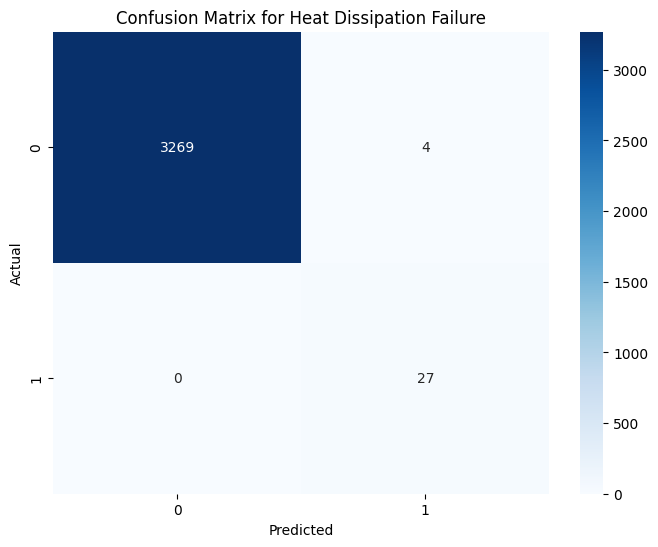

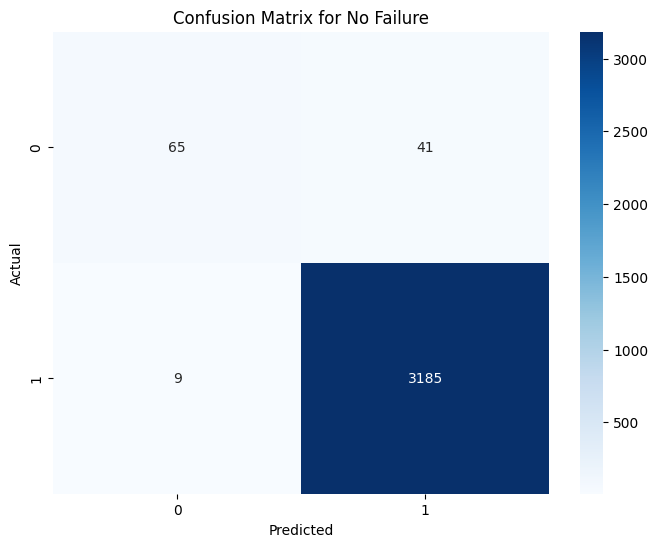

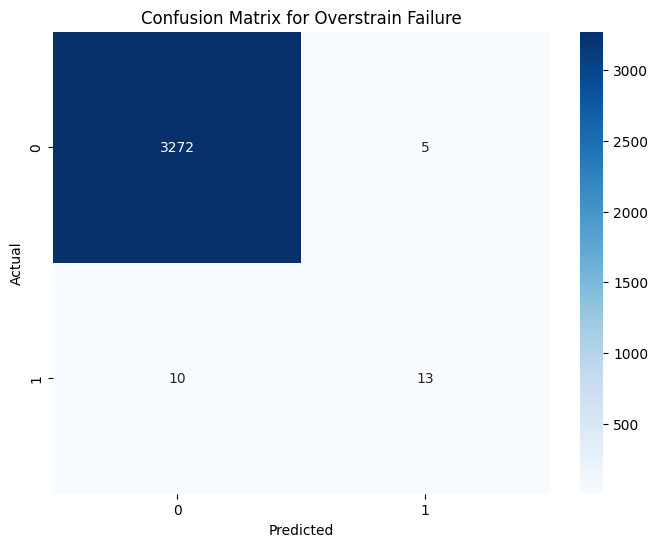

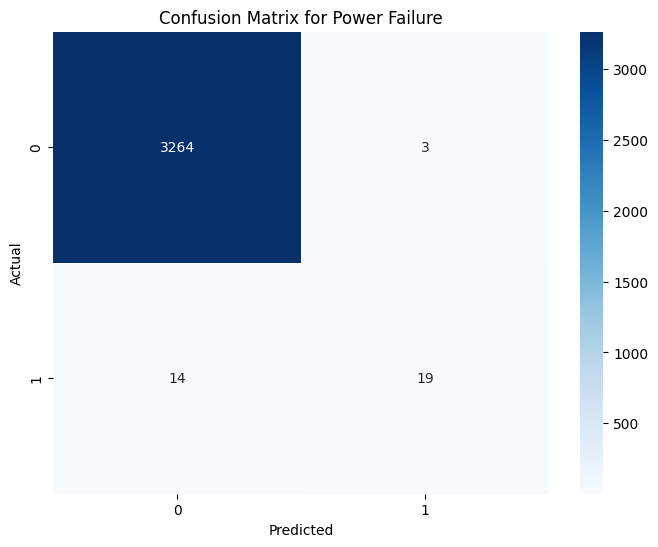

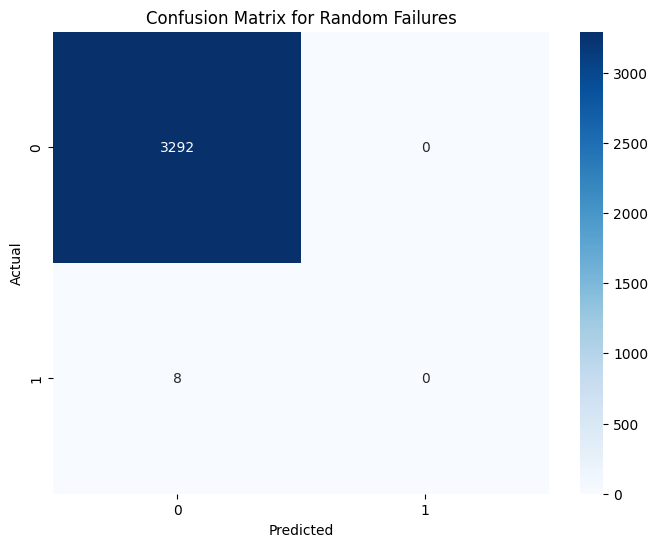

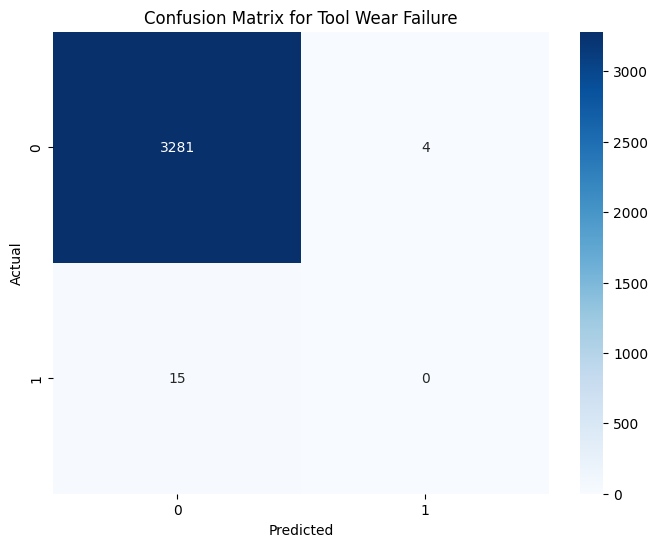

['app/scaler.pkl']

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.multioutput import ClassifierChain

# Load the dataset
file_path = 'data/predictive_maintenance.csv'
df = pd.read_csv(file_path)

# Check the unique values in the 'Failure Type' column
unique_failure_types = df['Failure Type'].unique()
print("Unique failure types:", unique_failure_types)

# Encode the 'Failure Type' as multi-label binary
lb = LabelBinarizer()
y = lb.fit_transform(df['Failure Type'])

# Check the number of classes produced by LabelBinarizer
print("Classes found by LabelBinarizer:", lb.classes_)

# Features and target labels
X = df.drop(['Target', 'UDI', 'Product ID', 'Type', 'Failure Type'], axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LGBMClassifier
lgbm = LGBMClassifier()

# Use ClassifierChain for multi-label classification
model = ClassifierChain(lgbm)
model.fit(X_train_scaled, y_train)

# Save the model to a file
model_filename = 'app/model.pkl'
joblib.dump(model, model_filename)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Adjust the target names if necessary
failure_types = lb.classes_

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=failure_types))

# Plot confusion matrices using seaborn
for i, failure in enumerate(failure_types):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {failure}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Save the scaler as well
scaler_filename = 'app/scaler.pkl'
joblib.dump(scaler, scaler_filename)
